In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set(rc={'figure.figsize':(12,5)})
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import os
import itertools
import re
from functools import cmp_to_key
sys.path.append(os.path.abspath('../modules'))
from hard_rules import candidate_cookies, versions_key, compare_versions

In [136]:
data = pd.read_parquet("../Data/10K_HH.parquet")

In [137]:
data = data[data["maid"]==7]

In [138]:
data["time"].apply(lambda t: (t.year, t.month)).value_counts().sort_index()

(2021, 12)         56
(2022, 1)         365
(2022, 2)          22
(2022, 12)    1329060
(2023, 1)     1402187
(2023, 2)      669026
Name: time, dtype: int64

In [139]:
data = data[data["time"] >= pd.to_datetime("2022-12-01")]

In [140]:
pattern = re.compile(r'^\d+(\.\d+)*$')
data = data[data.osversion.str.match(pattern)]

In [141]:
pattern = re.compile(r'^\d+(\.\d+)*$')
data = data[data.browserversion.str.match(pattern)]

In [142]:
data.sort_values(by="time")

,timestamp,filename,iiqid,hh_id,maid,partner_id,ip,iscellip,cellispid,domain,...,model,os,osversion,browser,advertisedbrowser,browserversion,type,is_best_ip,time,is_hh
5305360,1669852802551,HH_M,WorsfJNhdF,OVfCx6ZAeC,7,10253,1014397863,False,-1793086944,-1297673767,...,edge,windows,10,edge,Edge,107.0.1418.56,desktop,False,2022-12-01 00:00:02.551,True
274574,1669852802551,HH_M,WorsfJNhdF,OVfCx6ZAeC,7,10253,1014397863,False,-1793086944,-1297673767,...,edge,windows,10,edge,Edge,107.0.1418.56,desktop,False,2022-12-01 00:00:02.551,True
5799545,1669852815024,NHB_M,xR6Olq5vyY,1096230683,7,14,1096235864,False,-785738892,1632511751,...,sm-g950u,android,9,chrome mobile,Facebook on Android,9,smartphone,False,2022-12-01 00:00:15.024,True
1884467,1669852821516,HH_M,3bsIDAAL9s,uH94IApkve,7,14,1255127361,False,1891219528,-1545077811,...,chrome,windows,10,chrome desktop,Chrome,108.0.0.0,desktop,False,2022-12-01 00:00:21.516,True
6016795,1669852821516,HH_M,3bsIDAAL9s,uH94IApkve,7,14,1255127361,False,1891219528,-1545077811,...,chrome,windows,10,chrome desktop,Chrome,108.0.0.0,desktop,False,2022-12-01 00:00:21.516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296392,1677159416733,NHB_M,Ds994Aq4Kq,1097159426,7,14,1097159426,False,1205978362,-1043038672,...,sm-g950u,android,9,chrome mobile,Chromium,110.0.5481.65,smartphone,False,2023-02-23 13:36:56.733,True
8203159,1677159846956,NHB_M,EcAoAoIxDi,832838830,7,10253,832838830,False,-494206676,1702609264,...,sm-g996n,android,13,chrome mobile,Chrome Mobile,110.0.0.0,smartphone,False,2023-02-23 13:44:06.956,True
8296391,1677160051244,NHB_M,Ds994Aq4Kq,1097159426,7,14,1097159426,False,1205978362,303931829,...,sm-g950u,android,9,chrome mobile,Chromium,110.0.5481.65,smartphone,False,2023-02-23 13:47:31.244,True
8281614,1677160560033,HH_M,gzxxSoJdWU,2plgjo3PiK,7,14,1087495473,False,-1093811737,-1838687026,...,t810s,android,12,chrome mobile,Facebook on Android,12,smartphone,False,2023-02-23 13:56:00.033,True


In [143]:
grouped = data.groupby(['hh_id', 'iiqid']).agg({'time': ['min', 'max']})

In [144]:
grouped["lifespan"] = grouped[("time", "max")] - grouped[("time", "min")]

In [145]:
grouped["lifespan"] = grouped["lifespan"].apply(lambda t: t.days)

In [18]:
grouped.head()

time                         lifespan
                                          min                     max         
hh_id      iiqid                                                              
008lj1AMI8 6MILYBoI9P 2022-12-06 20:30:42.973 2023-02-03 17:29:52.687       58
           UVg62Vt8Va 2022-12-04 06:04:54.956 2023-02-03 22:48:53.120       61
           WATS0P8zVm 2023-01-04 09:04:24.973 2023-02-08 09:39:50.615       35
           mXwL7QCw5O 2022-12-02 17:01:54.895 2023-02-08 13:58:34.536       67
           vjNRSKwlH4 2022-12-01 20:43:03.895 2023-01-05 06:20:52.917       34

In [12]:
data.head()

,timestamp,filename,iiqid,hh_id,maid,partner_id,ip,iscellip,cellispid,domain,...,model,os,osversion,browser,advertisedbrowser,browserversion,type,is_best_ip,time,is_hh
317,1672454576791,HH_M,DkRTpvzRBp,2RrCJATsw0,7,15019,2935173494,True,1256337485,831946351,...,iphone,ios,16.0,safari,Mobile Safari,16.0,smartphone,False,2022-12-31 02:42:56.791,True
318,1672418570693,HH_M,DkRTpvzRBp,2RrCJATsw0,7,15019,1645510743,False,-390920904,831946351,...,iphone,ios,16.0,safari,Mobile Safari,16.0,smartphone,False,2022-12-30 16:42:50.693,True
319,1672278111596,HH_M,DkRTpvzRBp,2RrCJATsw0,7,15019,1193046921,False,-390920904,831946351,...,iphone,ios,16.0,safari,Mobile Safari,16.0,smartphone,False,2022-12-29 01:41:51.596,True
320,1672186457438,HH_M,DkRTpvzRBp,2RrCJATsw0,7,15019,1645512144,False,-390920904,831946351,...,iphone,ios,16.0,safari,Mobile Safari,16.0,smartphone,False,2022-12-28 00:14:17.438,True
321,1671982417563,HH_M,DkRTpvzRBp,2RrCJATsw0,7,15019,1645512144,False,-390920904,831946351,...,iphone,ios,16.0,safari,Mobile Safari,16.0,smartphone,False,2022-12-25 15:33:37.563,True


In [13]:
grouped.lifespan.max()

84

<Axes: xlabel='lifespan', ylabel='Count'>

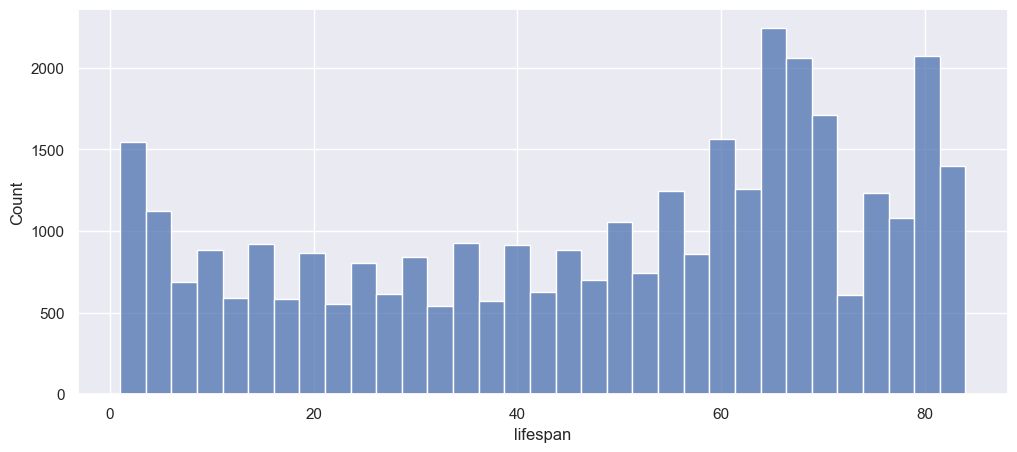

In [14]:
sns.histplot(data=grouped[grouped["lifespan"]>0], x="lifespan")
# sns.histplot(data=grouped, x="lifespan")

<BarContainer object of 2 artists>

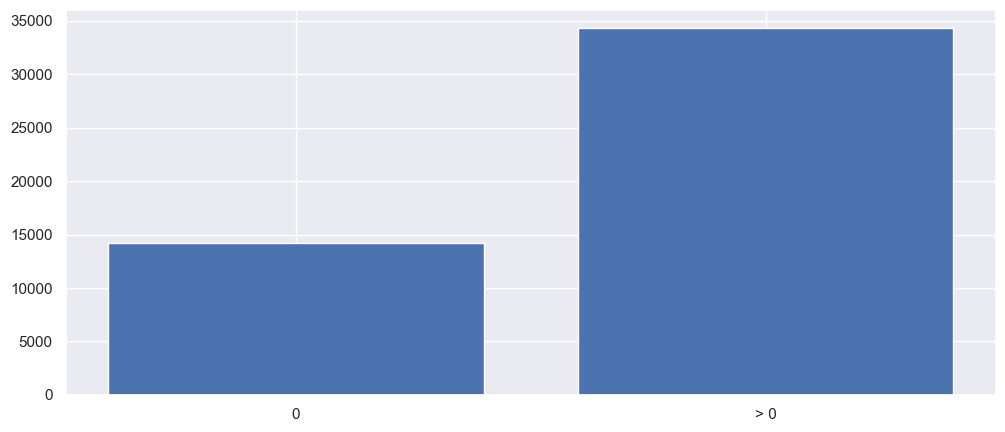

In [15]:
plt.bar(["0","> 0"], 
        [len(grouped[grouped["lifespan"]==0]), len(grouped[grouped["lifespan"]>0])])

In [16]:
grouped.head()

time                         lifespan
                                          min                     max         
hh_id      iiqid                                                              
008lj1AMI8 6MILYBoI9P 2022-12-06 20:30:42.973 2023-02-03 17:29:52.687       58
           UVg62Vt8Va 2022-12-04 06:04:54.956 2023-02-03 22:48:53.120       61
           WATS0P8zVm 2023-01-04 09:04:24.973 2023-02-08 09:39:50.615       35
           mXwL7QCw5O 2022-12-02 17:01:54.895 2023-02-08 13:58:34.536       67
           vjNRSKwlH4 2022-12-01 20:43:03.895 2023-01-05 06:20:52.917       34

In [17]:
one_row = grouped[grouped["lifespan"] > 60].sample(1)
one_row

time                         lifespan
                                          min                     max         
hh_id      iiqid                                                              
pf5jEgESJa WosrCrerQi 2022-12-08 05:19:27.969 2023-02-07 14:49:18.291       61

In [90]:
one_cookie = one_row.index.get_level_values(1).values[0]

In [91]:
one_cookie

'Bcjz15r0Ms'

In [92]:
one_cookie_data = data[data["iiqid"]==one_cookie]

In [93]:
one_cookie_data.browser.value_counts()

chrome mobile    37
Name: browser, dtype: int64

In [94]:
most_common_brw = one_cookie_data.browser.mode().iloc[0]

In [95]:
one_cookie_data = one_cookie_data[one_cookie_data["browser"]==most_common_brw]

<Axes: xlabel='time', ylabel='browserversion'>

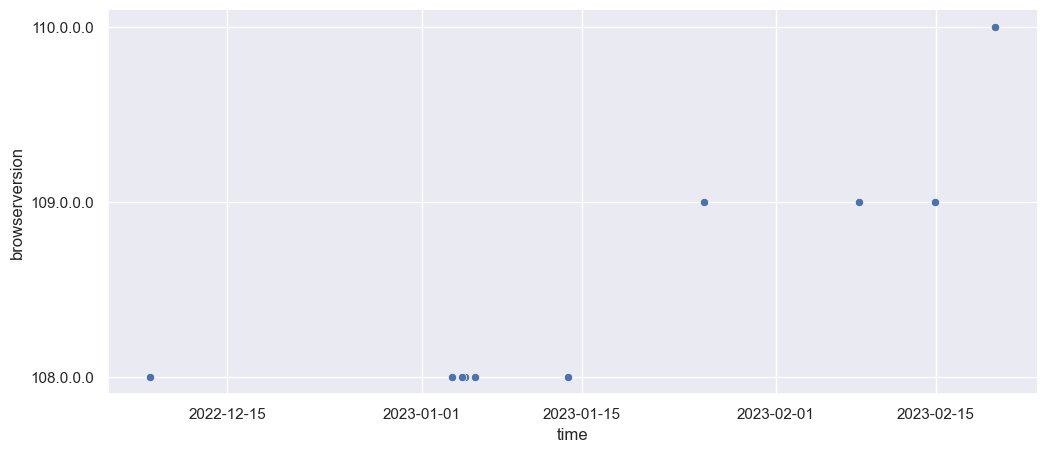

In [96]:
sns.scatterplot(data=one_cookie_data, x="time", y="browserversion")

## Lets try to find how many error are they

For a given cookie:
Go over all of its apearesnces and see if the browserversion stays consistent.
Lets strat by a simple "yes/no" test.

In [99]:
one_cookie_data = one_cookie_data.sort_values(by="time")

In [108]:
one_cookie_data["prev_browserversion"] = one_cookie_data["browserversion"].shift(1).fillna("0.0.0.0")

In [115]:
all(np.vectorize(compare_versions)(one_cookie_data['prev_browserversion'], one_cookie_data['browserversion']) <= 0)

True

In [75]:
def has_no_errors(cookie, df=data):
    one_cookie_data = df[df["iiqid"]==cookie].sort_values(by="time")
    one_cookie_data["prev_browserversion"] = one_cookie_data["browserversion"].shift(1).fillna("0.0.0.0")
    one_cookie_data["prev_osversion"] = one_cookie_data["osversion"].shift(1).fillna("0")
    browser_consistency = all(np.vectorize(compare_versions)(one_cookie_data['prev_browserversion'], one_cookie_data['browserversion']) <= 0)
    os_consistency = all(np.vectorize(compare_versions)(one_cookie_data['osversion'], one_cookie_data['osversion']) <= 0)
    return browser_consistency and os_consistency

In [119]:
has_no_errors(one_cookie)

True

In [146]:
data.sort_values(by="time", inplace=True)
# grouped_cookies = data.groupby(["hh_id", "iiqid"])

In [25]:
data[data['hh_id']=='1097159426'][['hh_id', 'iiqid', 'osversion']]

,hh_id,iiqid,osversion
8297176,1097159426,Ds994Aq4Kq,9
8297175,1097159426,Ds994Aq4Kq,9
8297174,1097159426,Ds994Aq4Kq,9
8297173,1097159426,Ds994Aq4Kq,9
8297172,1097159426,Ds994Aq4Kq,9
...,...,...,...
8296372,1097159426,I2g1DDxkA3,9
8296371,1097159426,I2g1DDxkA3,9
8296072,1097159426,k78WlySg6A,9
8296392,1097159426,Ds994Aq4Kq,9


In [21]:
data.groupby(['hh_id', 'iiqid'])['osversion'].shift(1)

5305360    NaN
274574      10
5799545    NaN
1884467    NaN
6016795     10
          ... 
8296392      9
8203159     13
8296391      9
8281614     12
8281613     12
Name: osversion, Length: 3400058, dtype: object

In [147]:
data['prev_osversion'] = data.groupby(['hh_id', 'iiqid'])['osversion'].shift(1).fillna("0")
data['prev_browserversion'] = data.groupby(['hh_id', 'iiqid'])['browserversion'].shift(1).fillna("0.0.0.0")

In [148]:
data[data['hh_id']==data['hh_id'].sample(1).values[0]].set_index(['hh_id', 'iiqid']).to_csv('temp.csv')

In [149]:
full_valid_rows = data[(np.vectorize(compare_versions)(data['osversion'], 
                                                         data['prev_osversion']) >= 0)
                       & (np.vectorize(compare_versions)(data['browserversion'], 
                                                               data['prev_browserversion']) >= 0)]

In [150]:
ok_rows_counts = full_valid_rows.groupby(['hh_id', 'iiqid']).size()

In [151]:
total_rows_counts = data.groupby(['hh_id', 'iiqid']).size()

In [152]:
all_ok = ok_rows_counts.eq(total_rows_counts)

In [153]:
all_ok.head(1)

hh_id       iiqid     
008lj1AMI8  6MILYBoI9P    True
dtype: bool

In [154]:
result = pd.concat([total_rows_counts, all_ok], axis=1)
result.columns = ['instances','ok'] 

In [21]:
result.head()

instances     ok
hh_id      iiqid                       
008lj1AMI8 6MILYBoI9P         66  False
           UVg62Vt8Va         41  False
           WATS0P8zVm        156  False
           mXwL7QCw5O         51  False
           vjNRSKwlH4         28   True

<Axes: xlabel='ok', ylabel='count'>

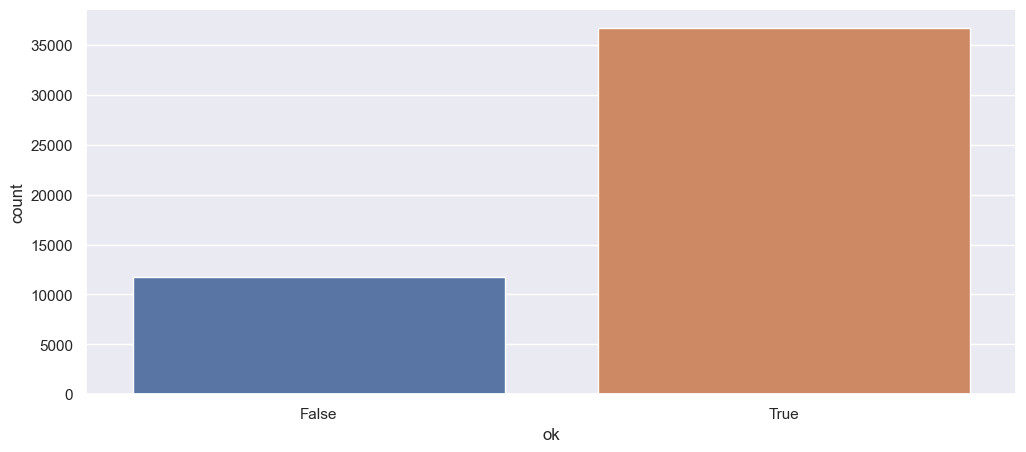

In [52]:
sns.countplot(data=result, x='ok')

In [155]:
cookie_hhd_data = pd.concat([grouped, result], axis=1)
cookie_hhd_data.columns = ["time_min", "time_max", "lifespan", "instances", "ok"]

In [54]:
lifespan_order = [str(i) for i in range(84, -1, -1)]

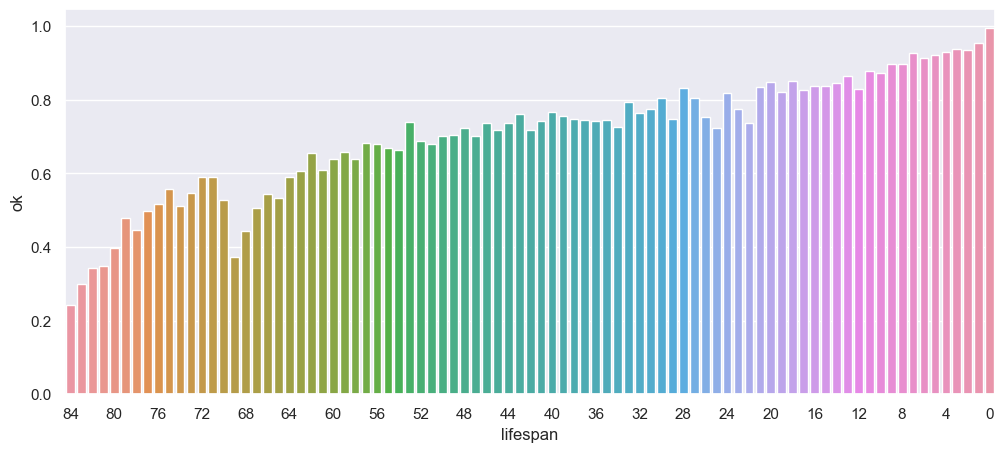

In [55]:
sns.barplot(data=cookie_hhd_data, x="lifespan", y="ok", errorbar=None, order=list(reversed(range(0, 85))))
plt.xticks(range(0, 85, 4));

In [23]:
found = False
limit_search = 1000
while not found and limit_search > 0:
    limit_search -= 1
    one_cookie_sample = cookie_hhd_data[cookie_hhd_data["ok"]==False].sample()
    one_cookie_id = one_cookie_sample.index.get_level_values(1).values[0]
    one_cookie_data = data[data["iiqid"]==one_cookie_id].copy()
    # browsers_of_cookie = one_cookie_data.browser.value_counts().sort_values(ascending=False)
    browsers_of_cookie = len(one_cookie_data.browser.unique())
    os_of_cookie = len(one_cookie_data.os.unique())
    if browsers_of_cookie == 1 and os_of_cookie == 1:
        # if len(browsers_of_cookie) > 1:
        # if browsers_of_cookie.iloc[1]  > browsers_of_cookie.sum()/4:
        found = True
if found:
    print("Found!")
else:
    print("Not Found")

Found!


In [173]:
# one_cookie_data.browser

In [160]:
one_cookie_sample = cookie_hhd_data[cookie_hhd_data["ok"]==False].sample()

In [161]:
one_cookie_id = one_cookie_sample.index.get_level_values(1).values[0]

In [162]:
one_cookie_data = data[data["iiqid"]==one_cookie_id]

In [163]:
browsers_of_cookie = one_cookie_data.browser.value_counts().sort_values(ascending=False)

In [164]:
browsers_of_cookie.sum()/4

48.5

In [175]:
one_cookie_data.browser.value_counts()

edge    246
Name: browser, dtype: int64

In [176]:
ordered_versions = sorted(one_cookie_data.browserversion.unique(), key=cmp_to_key(compare_versions))

<Axes: xlabel='time', ylabel='browserversion'>

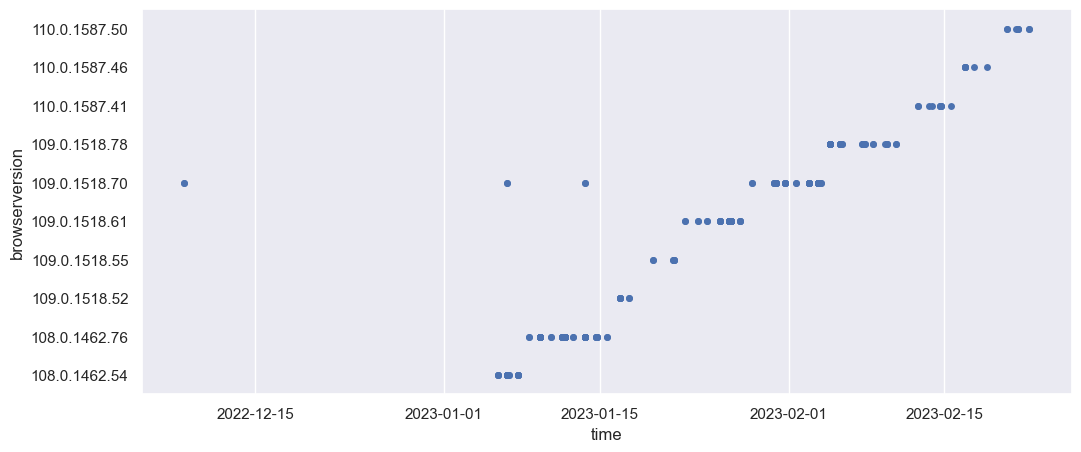

In [177]:
sns.stripplot(data=one_cookie_data, x="time", y="browserversion", 
              order=ordered_versions[::-1], jitter=False)

In [178]:
# one_cookie_data[one_cookie_data["browserversion"].apply(lambda v: v[0]=="2")]

In [179]:
one_cookie_id

'cUO4TrcMgH'

<Axes: title={'center': "Cookie's iiqid: cUO4TrcMgH"}>

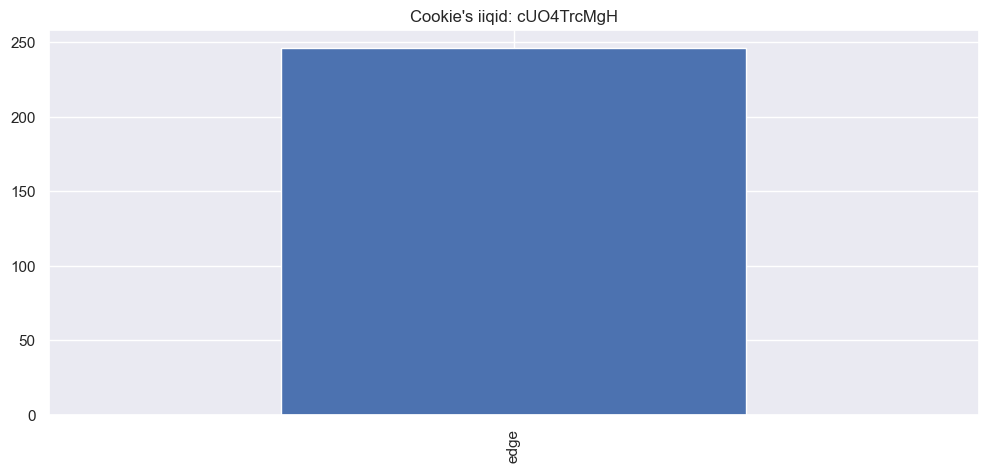

In [180]:
one_cookie_data.browser.value_counts().plot.bar(title=f"Cookie's iiqid: {one_cookie_id}")

## Mixed Constant For One Cookie

In [9]:
# data.groupby(["hh_id", "iiqid", 

In [10]:
unique_values_per_cookie = data.groupby(["hh_id", "iiqid"])[["timestamp", "brand", "model", "os", "browser"]].nunique()

In [11]:
unique_values_per_cookie["sum"] = unique_values_per_cookie.iloc[:,1:].sum(axis=1)

In [12]:
equal_4 = unique_values_per_cookie[unique_values_per_cookie["sum"]==4]
more_than_4 = unique_values_per_cookie[unique_values_per_cookie["sum"]>4]

Text(0.5, 1.0, 'Number of user agents assosiated with each cookie')

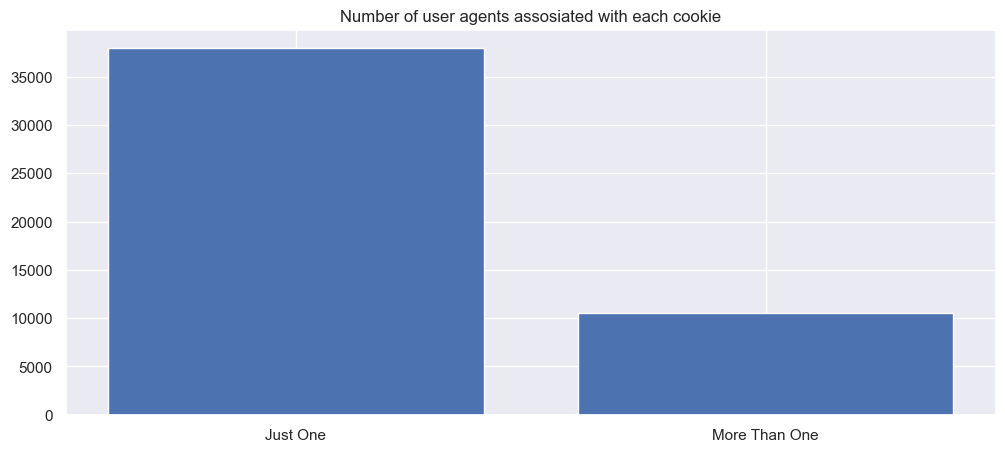

In [13]:
plt.bar(["Just One", "More Than One"], [len(equal_4), len(more_than_4)])
plt.title("Number of user agents assosiated with each cookie")

In [53]:
column_pick = "browser"
browser_counts = data.groupby(["hh_id", "iiqid"])[column_pick].value_counts()

In [54]:
unstacked_browser_counts = browser_counts.unstack(level=2).fillna(0).astype(int)

In [55]:
unstacked_browser_counts["mode"] = unstacked_browser_counts.idxmax(axis=1)

In [56]:
unstacked_browser_counts["total"] = unstacked_browser_counts.select_dtypes('number').sum(axis=1)

In [57]:
def get_value(row):
    return row[row['mode']]

unstacked_browser_counts["mode_count"] = unstacked_browser_counts.apply(get_value, axis=1)

In [58]:
unstacked_browser_counts["mode_fraction"] = unstacked_browser_counts["mode_count"] / unstacked_browser_counts["total"]

Text(0.5, 1.0, 'Distribution of UA homogeneity per cookie')

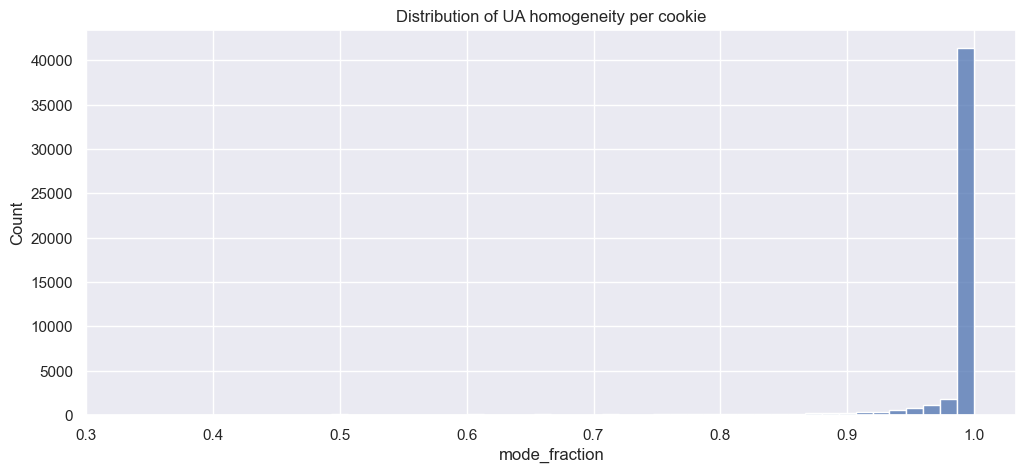

In [59]:
sns.histplot(data=unstacked_browser_counts, x="mode_fraction", bins=50)
plt.title("Distribution of UA homogeneity per cookie")

Text(0.5, 1.0, 'Distribution of UA homogeneity per cookie')

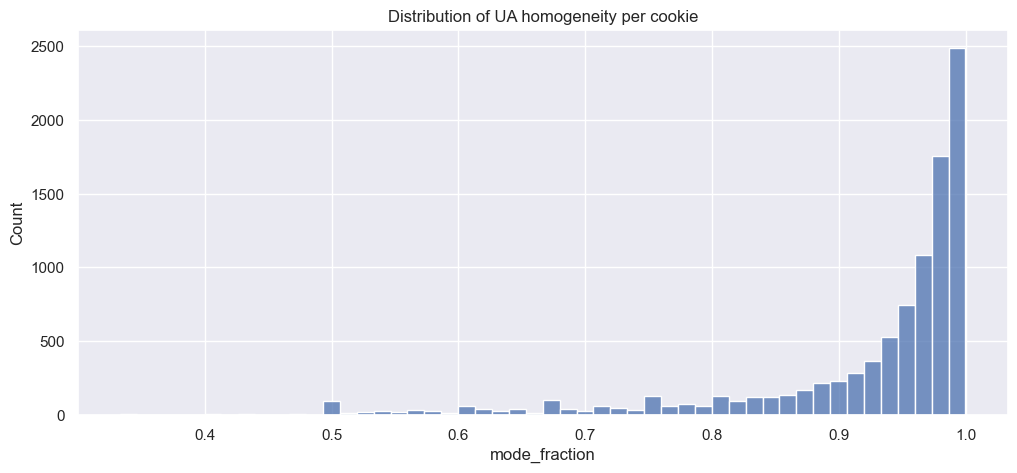

In [73]:
sns.histplot(data=unstacked_browser_counts[unstacked_browser_counts["mode_fraction"] < 1], x="mode_fraction", bins=50)
plt.title("Distribution of UA homogeneity per cookie")

## ow many errors are they, if we exclude the mixed UA

In [97]:
non_mixed_data = data[data["iiqid"].isin(equal_4.index.get_level_values(1).to_list())]

In [99]:
non_mixed_data = non_mixed_data.sort_values(by="time")

In [100]:
non_mixed_data['prev_osversion'] = non_mixed_data.groupby(['hh_id', 'iiqid'])['osversion'].shift(1).fillna("0")
non_mixed_data['prev_browserversion'] = non_mixed_data.groupby(['hh_id', 'iiqid'])['browserversion'].shift(1).fillna("0.0.0.0")

In [101]:
full_valid_rows = non_mixed_data[(np.vectorize(compare_versions)(non_mixed_data['osversion'], 
                                                         non_mixed_data['prev_osversion']) >= 0)
                       & (np.vectorize(compare_versions)(non_mixed_data['browserversion'], 
                                                               non_mixed_data['prev_browserversion']) >= 0)]

In [102]:
ok_rows_counts = full_valid_rows.groupby(['hh_id', 'iiqid']).size()

In [103]:
total_rows_counts = non_mixed_data.groupby(['hh_id', 'iiqid']).size()

In [104]:
all_ok = ok_rows_counts.eq(total_rows_counts)

In [105]:
result = pd.concat([total_rows_counts, all_ok], axis=1)
result.columns = ['instances','ok'] 

<Axes: xlabel='ok', ylabel='count'>

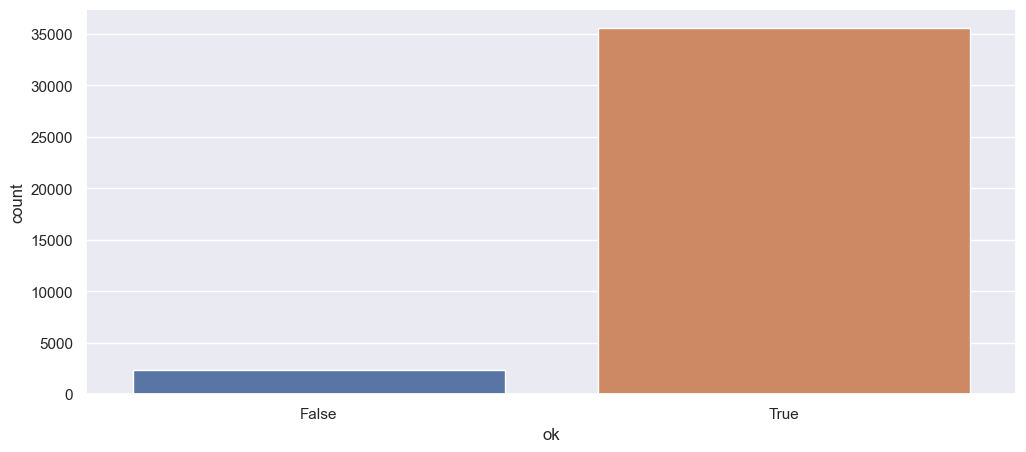

In [107]:
sns.countplot(data=result, x='ok')

In [110]:
grouped = non_mixed_data.groupby(['hh_id', 'iiqid']).agg({'time': ['min', 'max']})

In [111]:
grouped["lifespan"] = grouped[("time", "max")] - grouped[("time", "min")]

In [112]:
grouped["lifespan"] = grouped["lifespan"].apply(lambda t: t.days)

In [113]:
cookie_hhd_data = pd.concat([grouped, result], axis=1)
cookie_hhd_data.columns = ["time_min", "time_max", "lifespan", "instances", "ok"]

In [114]:
lifespan_order = [str(i) for i in range(84, -1, -1)]

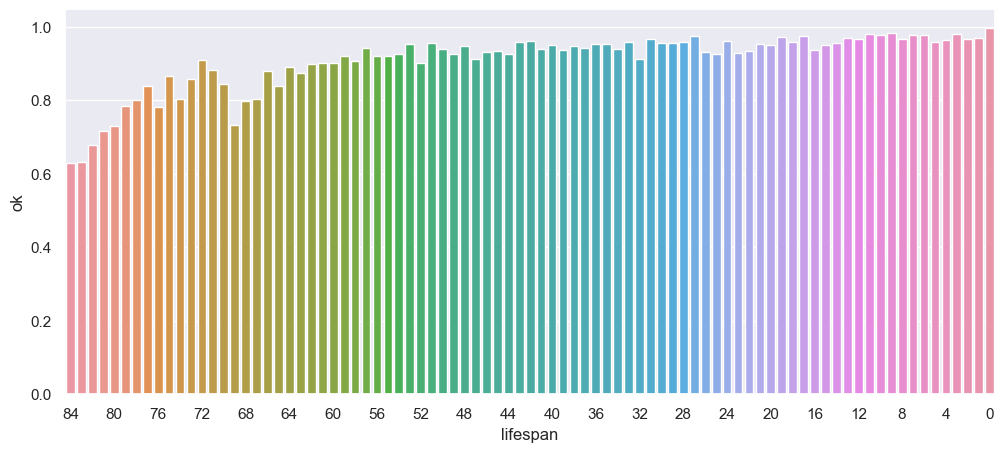

In [115]:
sns.barplot(data=cookie_hhd_data, x="lifespan", y="ok", errorbar=None, order=list(reversed(range(0, 85))))
plt.xticks(range(0, 85, 4));

In [129]:
# cookie_hhd_data["instances"].plot.hist()
sum(cookie_hhd_data["instances"] > 500) / len(cookie_hhd_data)

0.005588064737202804

<Axes: xlabel='instances', ylabel='ok'>

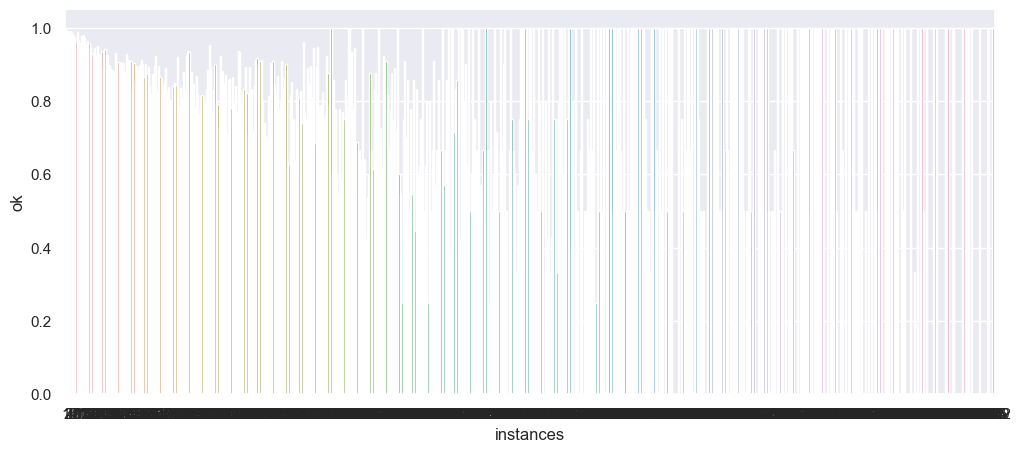

In [137]:
sns.barplot(data=cookie_hhd_data, x="instances", y="ok", errorbar=None) #, order=list(reversed(range(0, 85))))
# plt.xticks(range(0, 500, 50))
# plt.xlim(0, 500);

In [136]:
cookie_hhd_data.head()

time_min                time_max  \
hh_id      iiqid                                                        
008lj1AMI8 6MILYBoI9P 2022-12-06 20:30:42.973 2023-02-03 17:29:52.687   
           UVg62Vt8Va 2022-12-04 06:04:54.956 2023-02-03 22:48:53.120   
           WATS0P8zVm 2023-01-04 09:04:24.973 2023-02-08 09:39:50.615   
           mXwL7QCw5O 2022-12-02 17:01:54.895 2023-02-08 13:58:34.536   
           vjNRSKwlH4 2022-12-01 20:43:03.895 2023-01-05 06:20:52.917   

                       lifespan  instances    ok  
hh_id      iiqid                                  
008lj1AMI8 6MILYBoI9P        58         66  True  
           UVg62Vt8Va        61         41  True  
           WATS0P8zVm        35        156  True  
           mXwL7QCw5O        67         51  True  
           vjNRSKwlH4        34         28  True

In [244]:
found = False
while not found:
    one_cookie_sample = cookie_hhd_data[cookie_hhd_data["ok"]==False].sample()
    one_cookie_id = one_cookie_sample.index.get_level_values(1).values[0]
    one_cookie_data = data[data["iiqid"]==one_cookie_id]
    browsers_of_cookie = one_cookie_data.browser.value_counts().sort_values(ascending=False)
    if browsers_of_cookie.sum() > 25:
        if len(browsers_of_cookie) == 1:
            found = True

In [245]:
ordered_versions = sorted(one_cookie_data.browserversion.unique(), key=cmp_to_key(compare_versions))

Text(0.5, 1.0, "Cookie's iiqid: uwMFDFZwoX")

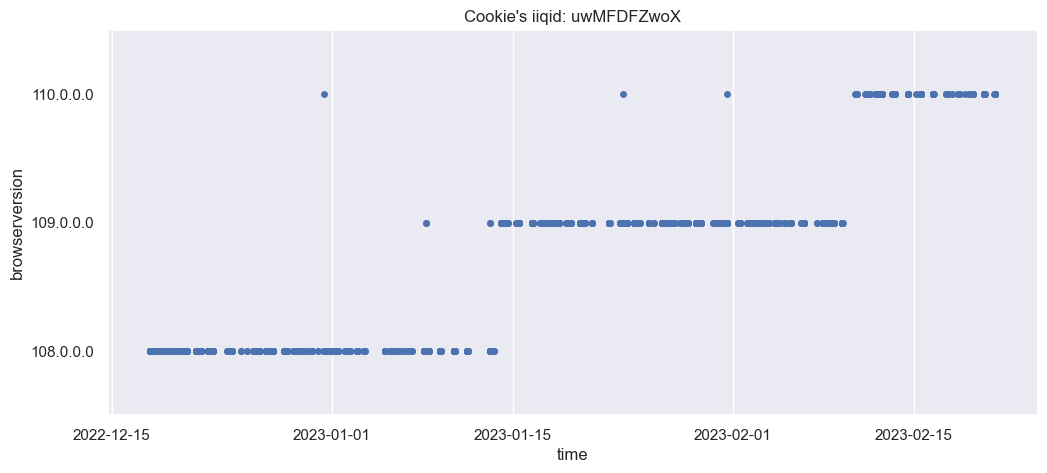

In [246]:
sns.stripplot(data=one_cookie_data, x="time", y="browserversion", 
              order=ordered_versions[::-1], jitter=False)
plt.title(f"Cookie's iiqid: {one_cookie_id}")

In [247]:
one_cookie_data.to_csv("another_example_for_version_noise.csv")

## Isotonic Regression

In [54]:
import sklearn as sk
from sklearn.isotonic import IsotonicRegression

In [46]:
single_example = one_cookie_data.copy()

In [47]:
ordered_versions = sorted(single_example.browserversion.unique(), key=cmp_to_key(compare_versions))

Text(0.5, 1.0, "Cookie's iiqid: PKkiFbUF6P")

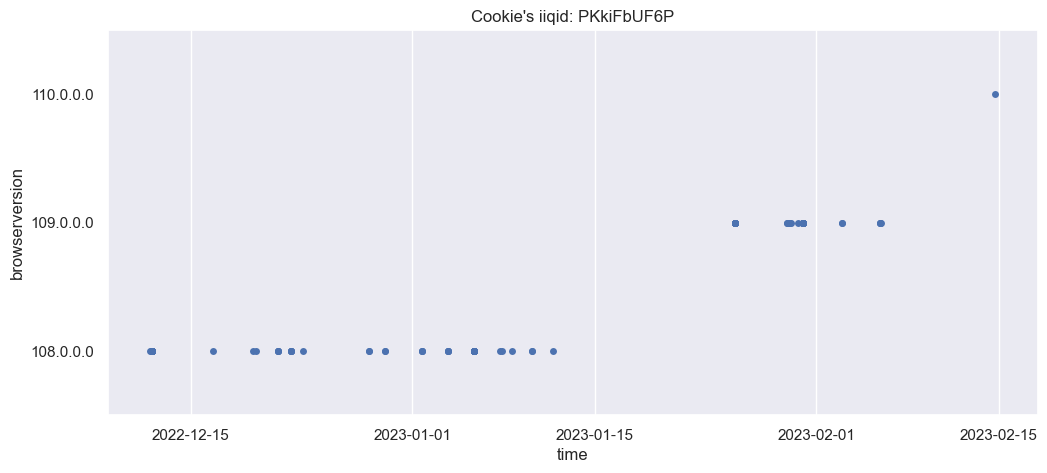

In [48]:
sns.stripplot(data=single_example, x="time", y="browserversion", 
              order=ordered_versions[::-1], jitter=False)
plt.title(f"Cookie's iiqid: {one_cookie_id}")

In [55]:
isotonic = IsotonicRegression() #out_of_bounds='clip')

In [196]:
serialized_browserversions = dict(enumerate(ordered_versions))

In [49]:
single_example['serial_browserversion'] = None

In [50]:
single_example['serial_browserversion'] = single_example['browserversion'].apply(lambda v: ordered_versions.index(v))

Text(0.5, 1.0, "Cookie's iiqid: PKkiFbUF6P")

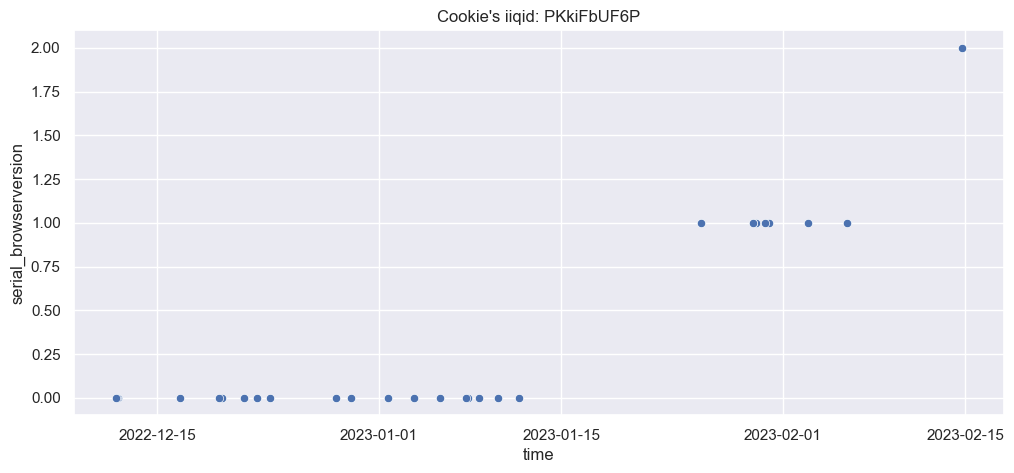

In [51]:
sns.scatterplot(data=single_example, x="time", y="serial_browserversion")#, jitter=False)
plt.title(f"Cookie's iiqid: {one_cookie_id}")

In [56]:
regressed_version = isotonic.fit_transform(single_example.time, single_example.serial_browserversion).round()

In [57]:
mask = np.where(single_example.serial_browserversion != regressed_version)

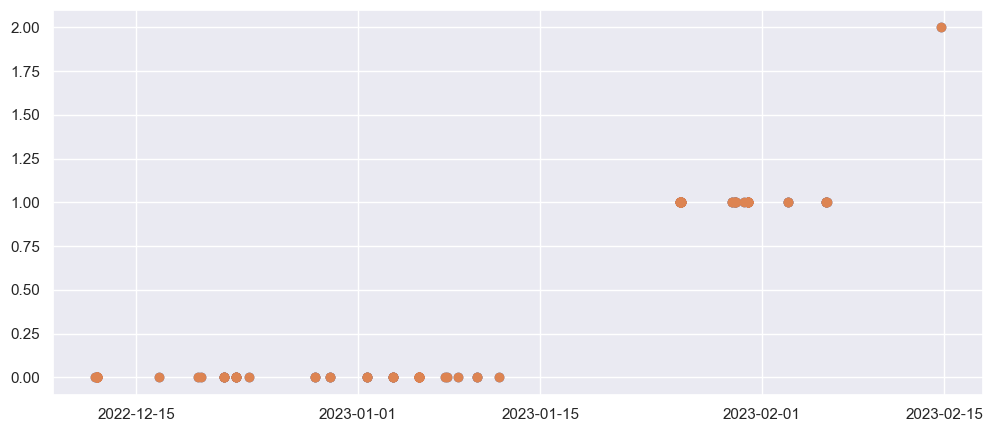

In [58]:
plt.scatter(single_example.time, regressed_version)
plt.scatter(single_example.time, single_example.serial_browserversion)
plt.scatter(single_example.time.iloc[mask], regressed_version[mask], s=200)

In [59]:
from lnds import longest_non_decreasing_subsequence as lnds

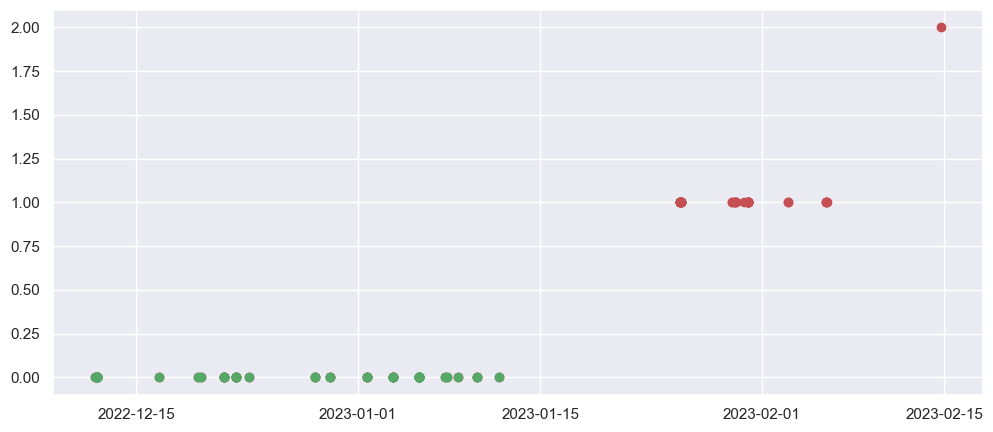

In [60]:
x, y = lnds(single_example.serial_browserversion.values)
plt.scatter(single_example.time, single_example.serial_browserversion, c='r')
plt.scatter(single_example.time.iloc[y], x, c='g')

In [301]:
len(x) / len(single_example)

0.975609756097561

### And now - using the modules

In [79]:
from hard_rules import denoised_fraction, version_serializtion

In [80]:
from lnds import longest_non_decreasing_subsequence as lnds

In [337]:
found = False
limit_search = 1000
while not found and limit_search > 0:
    limit_search -= 1
    one_cookie_sample = cookie_hhd_data[cookie_hhd_data["ok"]==False].sample()
    one_cookie_id = one_cookie_sample.index.get_level_values(1).values[0]
    one_cookie_data = data[data["iiqid"]==one_cookie_id].copy()
    browsers_of_cookie = len(one_cookie_data.browser.unique())
    os_of_cookie = len(one_cookie_data.os.unique())
    instances_of_cookie = len(one_cookie_data.time)
    if instances_of_cookie > 30 and browsers_of_cookie == 1 and os_of_cookie == 1:
        if denoised_fraction(one_cookie_data) < 0.95:
            found = True
if found:
    print("Found!")
else:
    print("Not Found")

Found!


In [338]:
denoised_fraction(one_cookie_data)

0.9365079365079365

In [339]:
denoised_fraction(one_cookie_data)

0.9365079365079365

In [340]:
versions_sorted = sorted(
        one_cookie_data.browserversion.unique(), key=cmp_to_key(compare_versions)
    )

In [341]:
vs = list(version_serializtion(one_cookie_data).values)
x, y = lnds(vs)
not_y = [i for i in range(len(one_cookie_data)) if i not in y]

[Text(0, 0, '10.9.2254.64339'), Text(0, 1, '108.0.5359.128')]

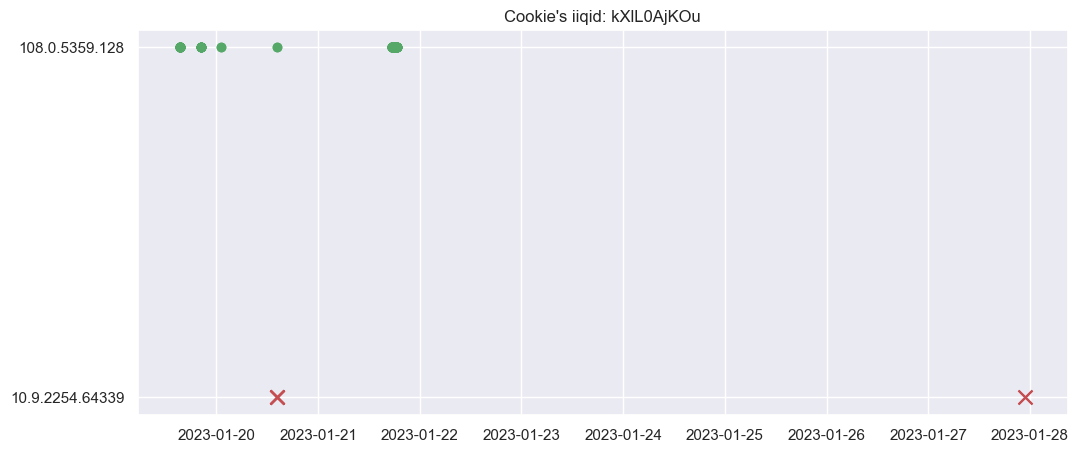

In [342]:
fig, ax = plt.subplots()
ax.scatter(one_cookie_data.time.iloc[not_y], 
           [v for i, v in enumerate(vs) if i in not_y], s=100, c='r', marker='x')
ax.scatter(one_cookie_data.time.iloc[y], x, c='g', marker='o')
ax.set_title(f"Cookie's iiqid: {one_cookie_id}")
ax.set_yticks(range(min(vs), max(vs)+1))
ax.set_yticklabels(versions_sorted)

In [293]:
one_cookie_data[["time", "osversion", "browserversion"]].head(15)

,time,osversion,browserversion
611920,2022-12-02 13:08:10.805,10,107.0.0.0
611919,2022-12-02 16:44:43.255,10,107.0.0.0
611918,2022-12-02 16:46:02.000,10,107.0.0.0
611917,2022-12-02 19:16:17.401,10,107.0.0.0
611916,2022-12-02 19:17:31.304,10,107.0.0.0
611915,2022-12-05 14:25:22.565,10,107.0.0.0
611914,2022-12-05 14:26:57.273,10,107.0.0.0
611913,2022-12-06 21:13:19.304,10,108.0.0.0
611912,2022-12-07 15:17:21.377,10,108.0.0.0
611911,2022-12-07 16:15:14.638,10,108.0.0.0
